In [69]:
import numpy as np
import math as mt
from PIL import Image as im
from matplotlib import pyplot as plt

raw_image = im.open('./bauckhage-gamma-1.png')
# raw_image = im.open('./bauckhage.jpg')
image = np.array(raw_image)
new_image = np.empty([image[:][0].size, image[0][:].size])
width = image[0][:].size
height = image[:][0].size

In [70]:
init_lev = 256
h = [0] * init_lev
for x in image:
    for pixel_intensity in x:
        h[pixel_intensity] += 1

p = [0] * init_lev
for i, val in enumerate(h):
    p[i] = float(val) / (width * height)

In [71]:
L = 8

In [72]:
a = [0]
for i in range(L):
    a.append((i + 1) * init_lev / L)
a.append(256)


b = []
for i in range(L + 1):
    b.append(i * init_lev / L + init_lev / (2 * L))

In [73]:
def E(a, b):
    sum = 0
    for nu in range(1, L + 1):
        for x in range(a[nu], a[nu + 1]):
            sum += (x - b[nu]) ** 2 * p[x]
    return sum

In [74]:
T = 10
a_new = a[:]
b_new = b[:]
prev_err = E(a_new, b_new)
for t in range(T):   
    for nu in range(1, len(a_new) - 1):
        a_new[nu] = int(float((b_new[nu] + b_new[nu - 1])) / 2)
    
    for nu in range(len(b_new)):
        numerator = 0
        delimeter = 0
        for x in range(a_new[nu], a_new[nu + 1]):
            numerator += x * p[x]
            delimeter += p[x]
        
        if delimeter == 0:
            b_new[nu] = 0
        else:
            b_new[nu] = numerator / delimeter
    
    err = E(a_new, b_new)
    if prev_err - err > 0.1:
        break
    else:
        prev_err = err
    # print 'a'
    # print a_new
            
    # print 'b'
    # print b_new

    print err

In [75]:
a_new

[0, 32, 64, 96, 128, 160, 192, 224, 256, 256]

In [76]:
b_new

[0,
 0,
 0,
 0,
 155.5,
 183.80552486187844,
 213.12866930318052,
 233.10793901912842,
 0]

[0, 32, 32, 64, 64, 96, 96, 128, 128, 160, 160, 192, 192, 224, 224, 256, 256, 256]
[0, 0, 0, 0, 0, 0, 0, 0, 155.5, 155.5, 183.80552486187844, 183.80552486187844, 213.12866930318052, 213.12866930318052, 233.10793901912842, 233.10793901912842, 0, 0]


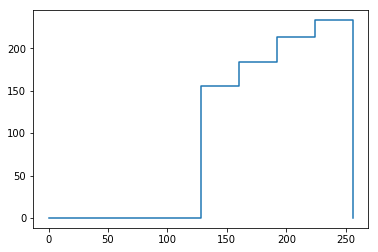

In [77]:
a_plot = [a_new[0]]
for i in range(1, len(a_new) - 1):
    a_plot += [a_new[i]] * 2 
a_plot.append(a_new[-1])

print a_plot

b_plot = []
for el in b_new:
    b_plot += [el] * 2
    
print b_plot

# a = [0, 64, 128]

# a_plot = [0, 32, 32, 64, 64, 96, 96, 128]
# b_plot = [1, 1, 2, 2, 3, 3, 4, 4]

plt.plot(a_plot, b_plot)
plt.show()

In [52]:
test = [2]
test + [1, 1]

[2, 1, 1]